1. Entender o pipeline do Stack da Elastic
    O aluno realizou a instalação de uma instância de Elastic Search?
    O aluno realizou a instalação de uma instância de Kibana?
    O aluno apresentou resultados de um servidor instalado?
    O aluno descreveu os campos do dataset e seus respectivos tipos de dados?
    O aluno escolheu um dataset contendo ao menos 1 campo textual?

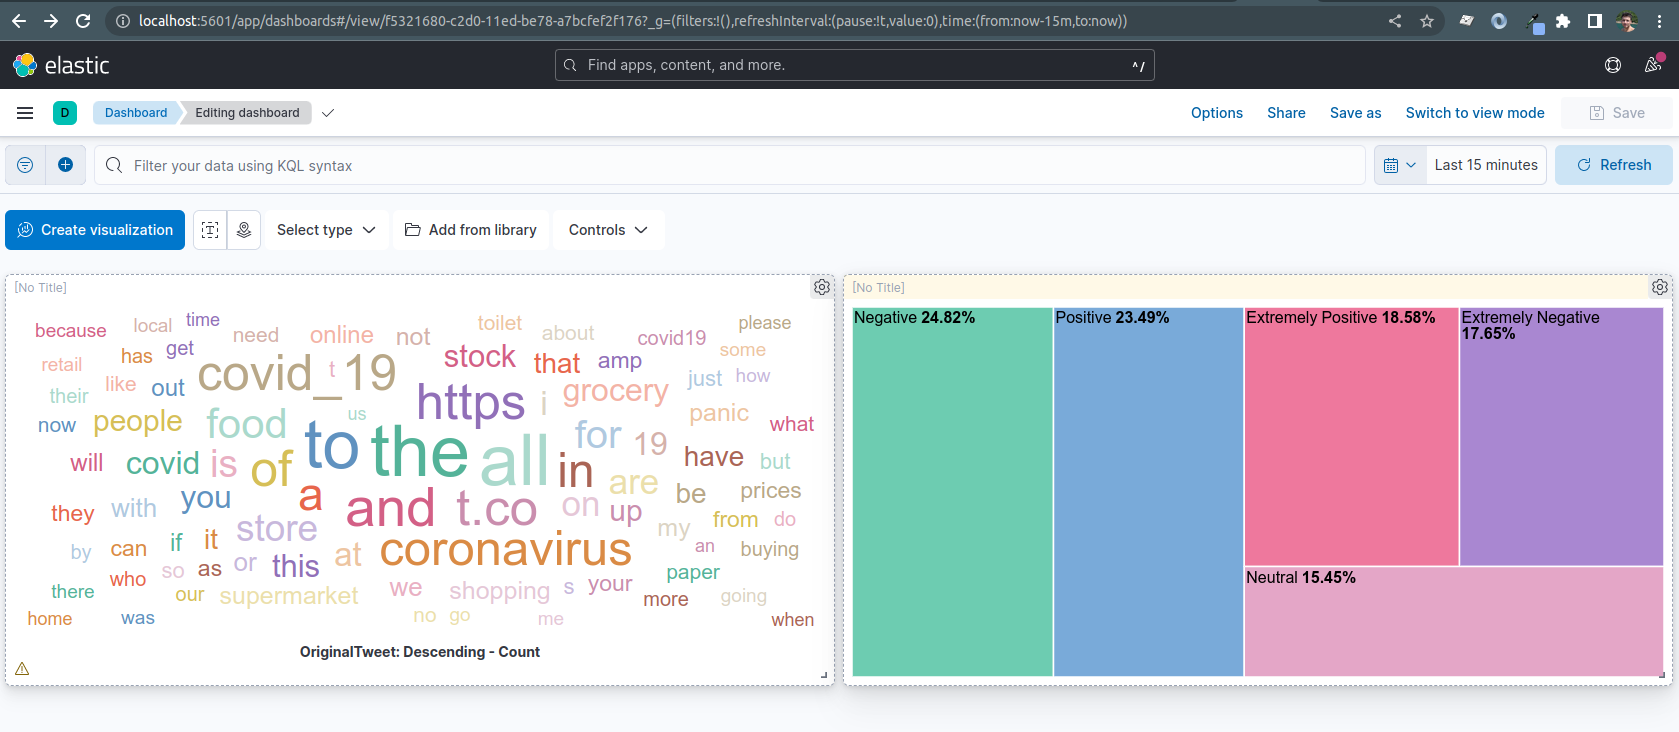

Campos do dataset
['ScreenName', 'OriginalTweet', 'Sentiment', 'TweetAt']


2. Executar MLT Queries na base do Elastic Search

    O aluno escolheu um dataset contendo ao menos 1 campo textual?
    
    O aluno elaborou um analyzer de texto para o campo textual?
    
    O aluno justificou a escolha de tokenizers?
    
    O aluno justificou a escolha de token-filters?


In [3]:
{
  "corona": {
    "settings": {
      "index": {
        "routing": {
          "allocation": {
            "include": {
              "_tier_preference": "data_content"
            }
          }
        },
        "number_of_shards": "1",
        "provided_name": "corona",
        "creation_date": "1679093606194",
        "analysis": {
          "analyzer": {
            "default": {
              "filter": [
                "stop",
                "lowercase",
                "stemmer"
              ],
              "tokenizer": "standard"
            }
          }
        },
        "number_of_replicas": "1",
        "uuid": "pmGgup61SfCAIbH_tCkvug",
        "version": {
          "created": "8060099"
        }
      }
    }
  }
}

{'corona': {'settings': {'index': {'routing': {'allocation': {'include': {'_tier_preference': 'data_content'}}},
    'number_of_shards': '1',
    'provided_name': 'corona',
    'creation_date': '1679093606194',
    'analysis': {'analyzer': {'default': {'filter': ['stop',
        'lowercase',
        'stemmer'],
       'tokenizer': 'standard'}}},
    'number_of_replicas': '1',
    'uuid': 'pmGgup61SfCAIbH_tCkvug',
    'version': {'created': '8060099'}}}}}

Foi utilizado o tokenizer standard pois ele remove a maioria dos símbolos de pontuação e funciona bem para a maioria das linguas

Os token-filters utilizados foram:

stop -> remove stop words
lowercase -> facilita na busca colocando em lowercase
stemmer -> reduz cada palavra individualmente e reduzi-la à sua raiz

3. Desenvolver um classificador de categorias de texto

    O aluno criou uma configuração de Mapping?
    
    O aluno realizou a importação de dados para o índice criado?
    
    O aluno usou bulk para inserção de dados?
    
    O aluno importou dados com pelo menos um campo textual?

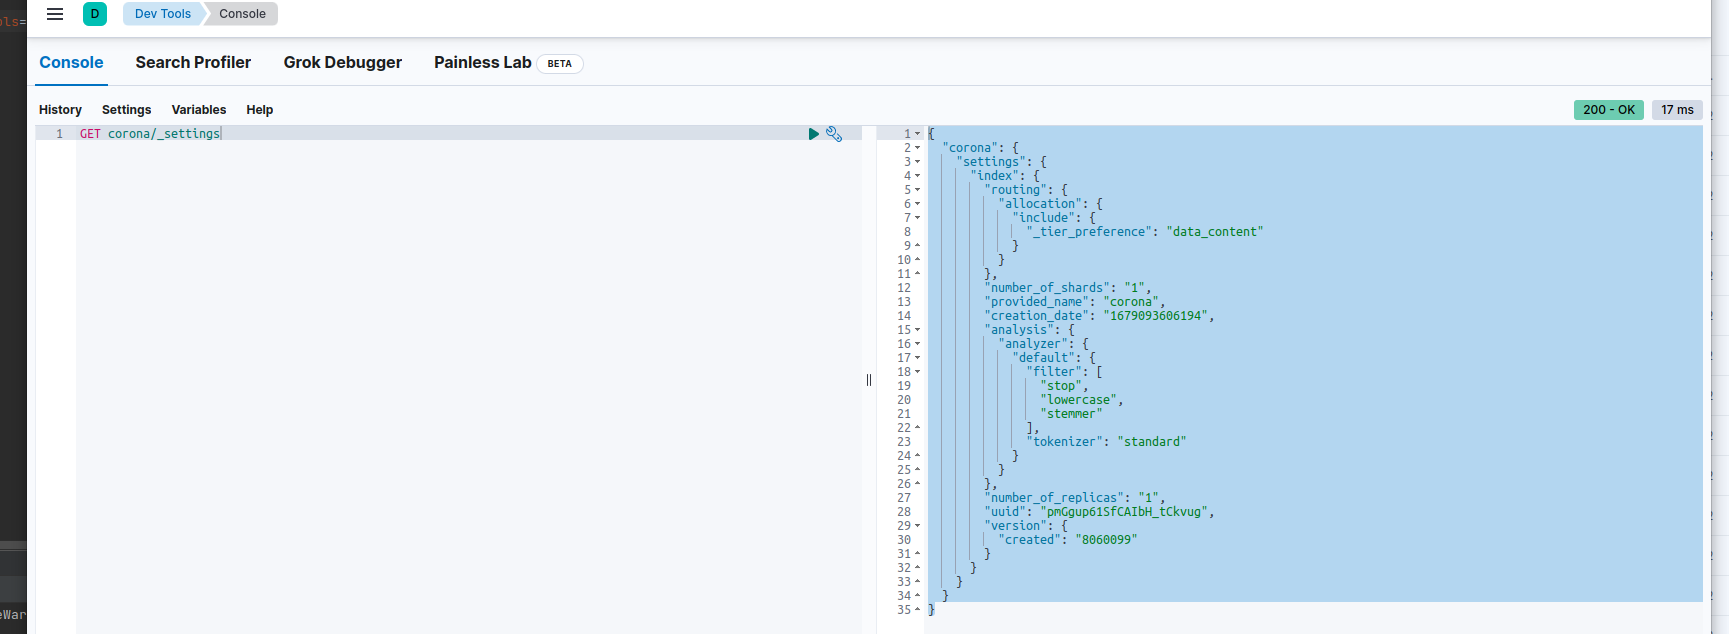

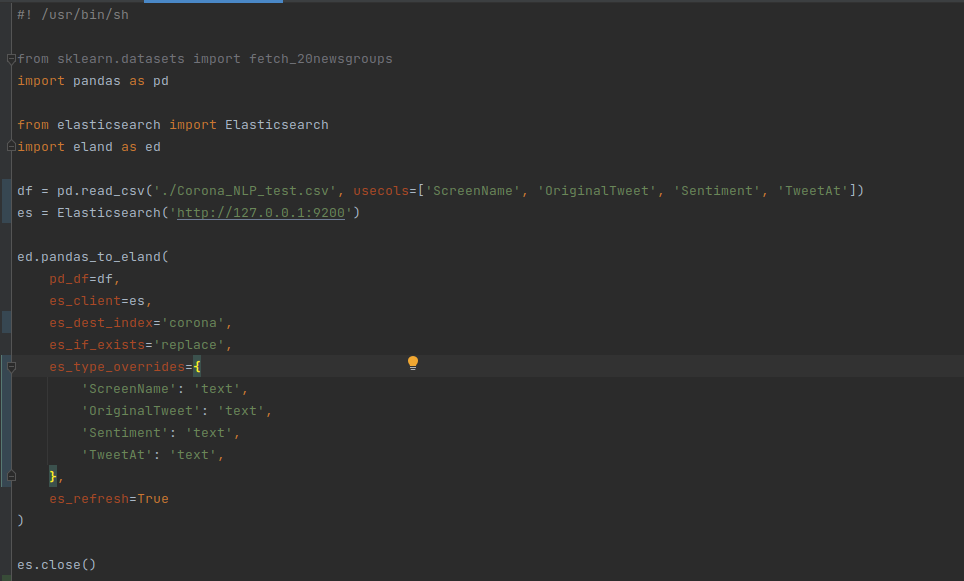

4. Desenvolver um sistema de recomendação utilizando queries MLT

   O aluno realizou uma agregação no campo textual?
    
   O aluno realizou uma agregação como nuvem de palavra?

   O aluno realizou uma agregação em algum outro campo da base de dados?
    
   O aluno realizou uma query MLT de um campo como se fosse um kNN?

more like this QUERY


GET corona/_search
{
  "size": 5,
  "_source": [
    "OriginalTweet"
  ],
  "query": {
    "more_like_this": {
      "fields": [
        "OriginalTweet"
      ],
      "min_term_freq": 1,
      "max_query_terms": 12,
      "like": [
        {
          "_index": "corona",
          "_id": "2917"
        }
      ]
    }
  }
}

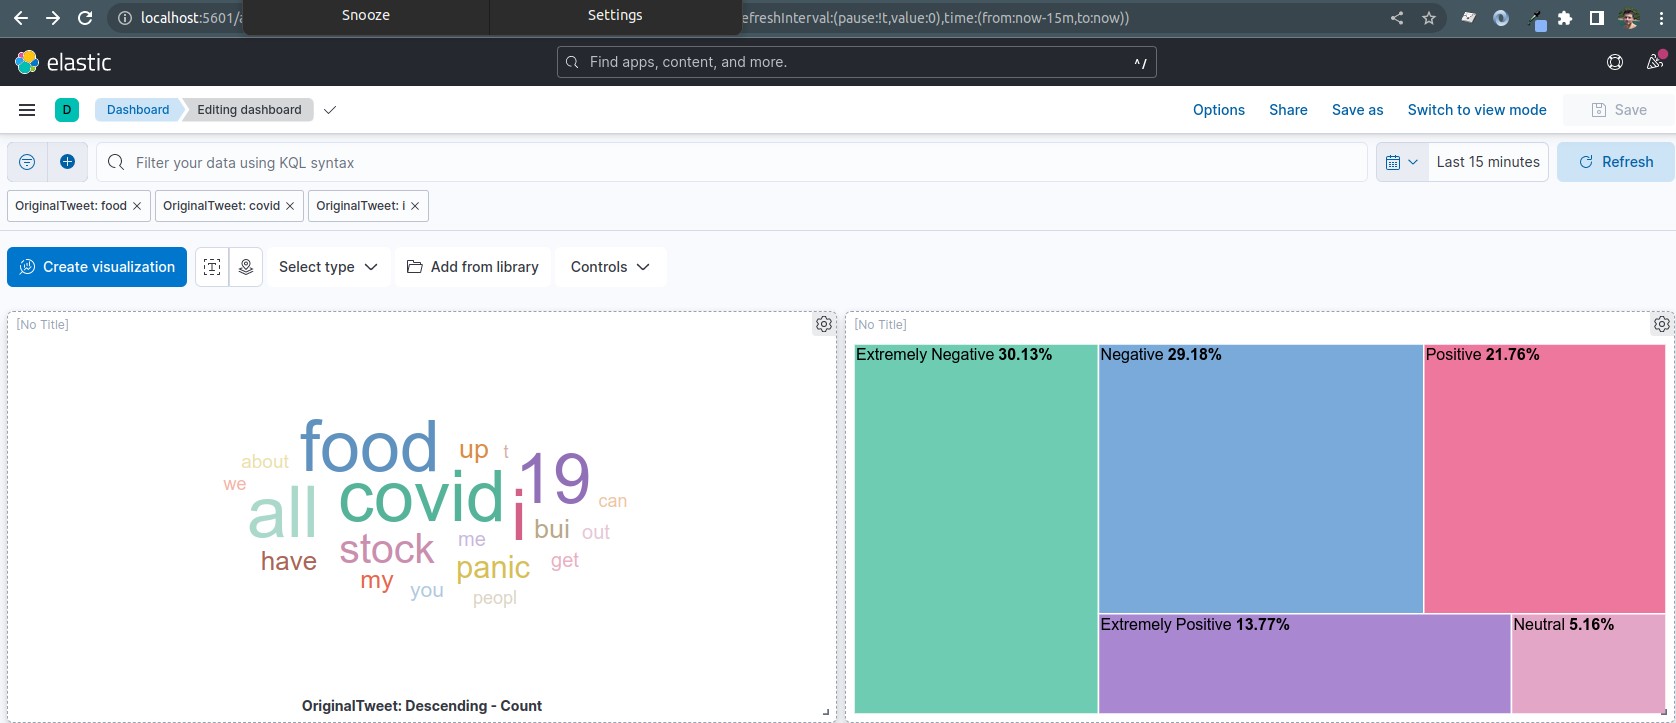

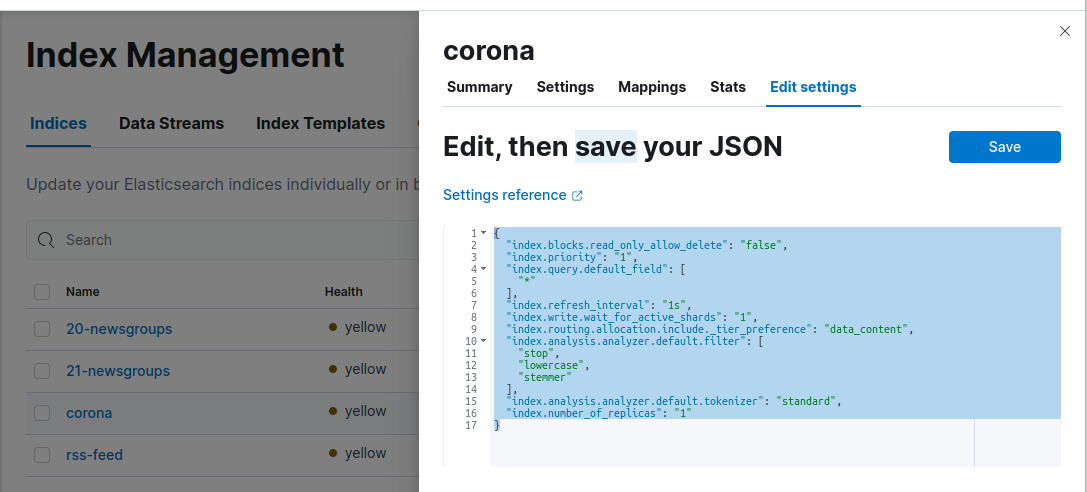

{
  "index.blocks.read_only_allow_delete": "false",
  "index.priority": "1",
  "index.query.default_field": [
    "*"
  ],
  "index.refresh_interval": "1s",
  "index.write.wait_for_active_shards": "1",
  "index.routing.allocation.include._tier_preference": "data_content",
  "index.analysis.analyzer.default.filter": [
    "stop",
    "lowercase",
    "stemmer"
  ],
  "index.analysis.analyzer.default.tokenizer": "standard",
  "index.number_of_replicas": "1"
}